In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from scipy.ndimage.filters import gaussian_filter1d

%matplotlib inline

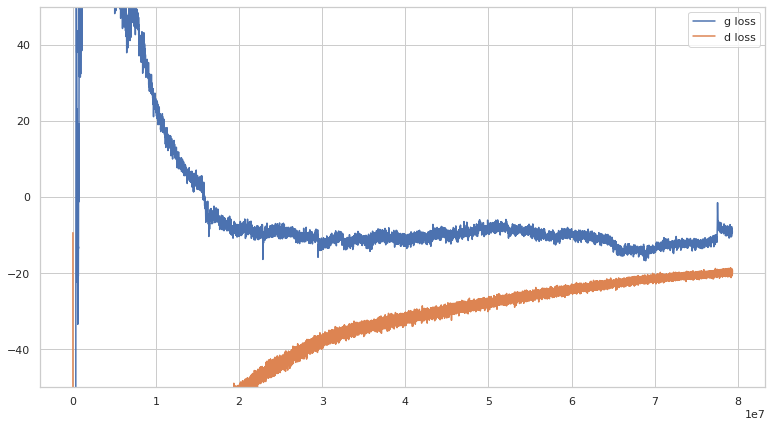

In [2]:
experiment_id= "0498286e20324dce9f0d8d4e802fdc2c"
mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/30/{}/metrics".format(experiment_id)
def mlflow_path(x):
    return os.path.join(mlflow_dir, x)
    
g_loss = np.loadtxt(mlflow_path('G loss'))
d_loss = np.loadtxt(mlflow_path('D loss'))

g_loss[:,0] -= g_loss[0,0]
d_loss[:,0] -= d_loss[0,0]

sigma=5

sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
plt.plot(g_loss[:,0], gaussian_filter1d(g_loss[:,1], sigma=sigma), label="g loss")
plt.plot(d_loss[:,0], gaussian_filter1d(d_loss[:,1], sigma=sigma), label="d loss")
plt.ylim(-50,50)
plt.legend()

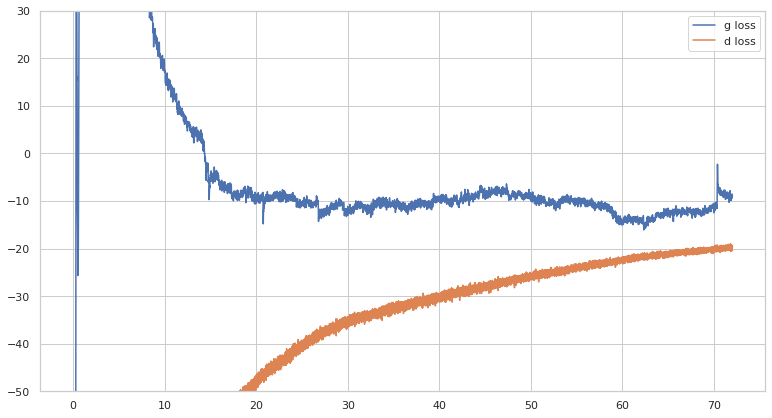

In [4]:

xg = np.linspace(0, 72, len(g_loss[:,0]))
xd = np.linspace(0, 72, len(d_loss[:,0])) 

sigma=10

sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
plt.plot(xg, gaussian_filter1d(g_loss[:,1], sigma=sigma), label="g loss")
plt.plot(xd, gaussian_filter1d(d_loss[:,1], sigma=sigma), label="d loss")
#plt.yscale("symlog")
plt.xscale("linear")
plt.ylim(-50,30)
plt.legend()

In [39]:
import healpy as hp
NSIDE = 8192/4
lmax = NSIDE*3-1
res = hp.pixelfunc.nside2resol(NSIDE, arcmin=False)
print(NSIDE, lmax, res, 0.0004996712441144963*(180/np.pi)*60, np.pi/res, np.pi/(256*res))

2048.0 6143.0 0.0004996712441144963 1.717743205908703 6287.319293623225 24.559840990715724


In [41]:
256*res*180/np.pi

7.329037678543799